In [1]:
from PIL import Image, ImageOps
# hr_width = 5120
# im = Image.open('0001.png')
# im = ImageOps.pad(im, size=(hr_width, 1600),centering=(0.5, 0.5))
# im.save('changed.png')

In [2]:
# def image_flip(img):
#     """
#     Flip an image to horizontal if the image is oriented vertically. Keep the horizontal image as it is.

#     :param img: image
#     :return: flipped image
#     """

#     width, height = img.size
#     aspect_ratio = width / height

#     if aspect_ratio < 1:
#     # The image is vertical, so rotate it
#         img = img.transpose(method=Image.Transpose.ROTATE_90)

#     return img

In [3]:
# image = Image.open("0001.png")
# image = image_flip(image)
# # Save the rotated image
# image.save("0001changed.png")

In [4]:
from pathlib import Path
basedir = Path.cwd() # get the parent directory of the current file
data_folder = basedir / 'Datasets'
# img_path = data_folder / '0001changed.png'
# print(img_path.stem)

In [5]:
import os


In [6]:
# txt = img_path.stem
# a = txt.split('.')[0]
# # img_lr_dir = os.path.join(self.data_folder, 'DIV2K_train_LR_bicubic', 'X' + str(self.scaling_factor), index + '.png')
# print(a)


In [7]:
scaling_factor = 2


In [8]:
# hr_images_list = []
# for i in os.listdir(training_path_hr):
#         img_path = training_path_hr / str(i)
#         hr_images_list.append(img_path)
# index = hr_images_list[0].stem
# # print(hr_images_list)
# # for a in hr_images_list:
# #     img = Image.open(a)
# #     img = image_flip(img)
# #     img.save(a)

# img_lr_path = data_folder /  f"DIV2K_train_LR_bicubic_X{scaling_factor}" / f'{index}x{scaling_factor}.png'
# img_lr = Image.open(img_lr_path, mode='r')
# lr_img = img_lr.convert('RGB')
# # lr_img= transform(lr_img)
# image.show()



In [9]:
import torch
from torch.utils.data import Dataset
# import json
import os
from PIL import Image, ImageOps
from src.utils import ImageTransforms


c:\Users\ethsi\.conda\envs\yusen\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
class SRDataset(Dataset):
    """
    A PyTorch Dataset to be used by a PyTorch DataLoader.
    """

    def __init__(self, data_folder, split, width, scaling_factor):
        """
        :param data_folder: # pass the data folder path object into the class
        :param split: one of 'train' or 'test'
        :param crop_size: crop size of target HR images
        :param scaling_factor: the input LR images will be downsampled from the target HR images by this factor; the scaling done in the super-resolution
        # :param lr_img_type: the format for the LR image supplied to the model; see convert_image() in utils.py for available formats
        # :param hr_img_type: the format for the HR image supplied to the model; see convert_image() in utils.py for available formats
        # :param test_data_name: if this is the 'test' split, which test dataset? (for example, "Set14")
        """

        self.data_folder = data_folder
        self.split = split.lower()
        self.width = int(width)
        self.scaling_factor = int(scaling_factor)


        assert self.split in {'train', 'test'}


        # Read list of image-paths
        hr_images_list = []
        if self.split == 'train':
            hd = data_folder / 'DIV2K_train_HR'
            for i in os.listdir(hd):
                img_path = hd / str(i)
                hr_images_list.append(img_path)
            self.images = hr_images_list
        else:
            hd = data_folder / 'DIV2K_valid_HR'
            for i in os.listdir(hd):
                img_path = hd / str(i)
                hr_images_list.append(img_path)
            self.images = hr_images_list

                
             

        # Select the correct set of transforms
        self.transform = ImageTransforms(split=self.split,
                                         width=self.width, 
                                         scaling_factor=self.scaling_factor)

    def __getitem__(self, i):
        """
        This method is required to be defined for use in the PyTorch DataLoader.
        :param i: index to retrieve
        :return: the 'i'th pair LR and HR images to be fed into the model
        """
        # Read image
        img_hr_dir = self.images[i]
        print(img_hr_dir)
        index = img_hr_dir.stem
        if self.split == 'train':
            img_lr_dir = data_folder /  f"DIV2K_train_LR_bicubic_X{scaling_factor}" / "DIV2K_train_LR_bicubic" / f"X{scaling_factor}"/ f'{index}x{scaling_factor}.png'
        else:
            img_lr_dir = data_folder /  f"DIV2K_valid_LR_bicubic_X{scaling_factor}" / "DIV2K_valid_LR_bicubic" / f"X{scaling_factor}"/ f'{index}x{scaling_factor}.png'
        print(img_lr_dir)


        img_lr = Image.open(img_lr_dir)
        lr_img = img_lr.convert('RGB')
        img_hr = Image.open(img_hr_dir)
        hr_img = img_hr.convert('RGB')
        lr_img= self.transform(lr_img)
        hr_img = self.transform(hr_img)

        return lr_img, hr_img

    def __len__(self):
        """
        This method is required to be defined for use in the PyTorch DataLoader.

        :return: size of this data (in number of images)
        """
        return len(self.images)

In [11]:

data_folder = basedir / 'Datasets'
width = 2040
scaling_factor = 2
batch_size = 1
workers = 0

In [12]:
train_dataset = SRDataset(data_folder,
                              split='train',
                              width=width,
                              scaling_factor=scaling_factor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [13]:
import matplotlib.pyplot as plt

c:\Users\ethsi\amls2\AMLSII_22-23_SN22081179\Datasets\DIV2K_train_HR\0580.png
c:\Users\ethsi\amls2\AMLSII_22-23_SN22081179\Datasets\DIV2K_train_LR_bicubic_X2\DIV2K_train_LR_bicubic\X2\0580x2.png
Feature batch shape: torch.Size([1, 3, 1020, 1020])
Labels batch shape: torch.Size([1, 3, 2040, 2040])


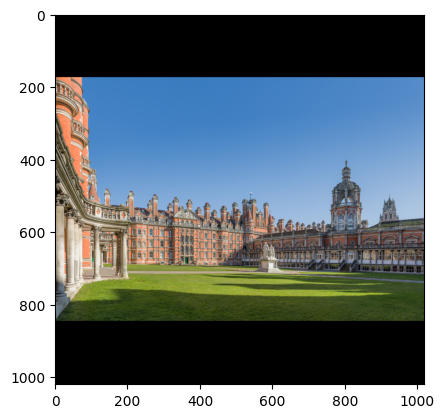

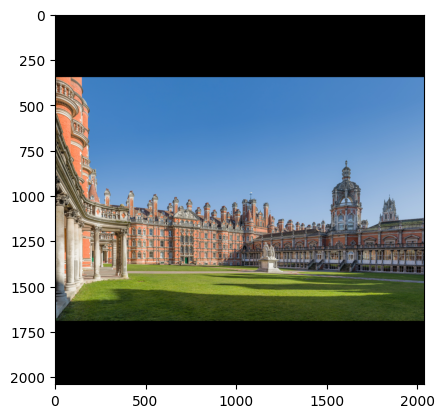

In [14]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()
# plt.imshow(label)
# plt.show()
plt.imshow(label.permute(1, 2, 0).numpy())
plt.show()